In [13]:
######### Package Import ######################
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from PIL import Image
import random

In [2]:
file_path = "Facebook_Data.json"
text_list = [] 
with open(file_path, "r", encoding = "UTF-8") as json_file:
    # print(json_file)
    data = json.load(json_file)
    for obj in data:
        text_list.append(" ".join(obj['text']))
        if obj['comments'] != []:
            comments = obj['comments']
            for comment in comments:
                text_list.append(" ".join(comment['text']))

print("Total posts and comments:", len(text_list))
# print(text_list)

Total posts and comments: 4080


In [3]:
############### Tokenize Words ###################
# word_tokenize() function takes a text blob and breaks it into 'words'.
news_content = " ".join(text_list).lower()

tokenizer = RegexpTokenizer(r'\w+')
#news_words = word_tokenize(news_content)
news_words = tokenizer.tokenize(news_content)
# print (news_words)
# How many words are in this news article?
print ("Total Number of Words",len(news_words))

Total Number of Words 140367


In [4]:
################# Load Stopwords #################
# Let's load up English corpus from NLTK package.
stop_words = stopwords.words('english')
# See what words are inside.
stop_words = stop_words + ['https', 'http', "com", "facebook", "www", "black", "live", "matter", "the", "blm", "like", "want", "php", "youtu", "youtube", "watch", "cheick", "hamidou", "ouedraogo", "comment", "white","people","live","go","one","need"]
# print (stop_words)

In [5]:
########### Filter out Stopwords ############
news_words_filtered = []

for w in news_words:
    if w not in stop_words:
        news_words_filtered.append(w)

# After removing stop words, how many words remain?
print ("Total Number of Words after Filter:",len(news_words_filtered))
# print(news_words_filtered)

Total Number of Words after Filter: 72498


In [6]:
############# Word Stemming ############3#
porter_stemmer = PorterStemmer()

# Let's stem all the words in our news article.
news_words_filtered_stemmed = []
for w in news_words_filtered:
    news_words_filtered_stemmed.append(porter_stemmer.stem(w))

print("Words Stemmed")
# print (news_words_filtered_stemmed[:500])

Words Stemmed


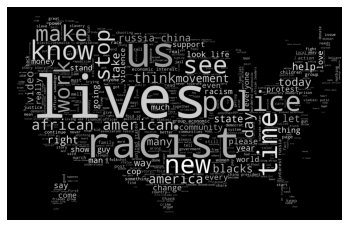

WordCloud Original


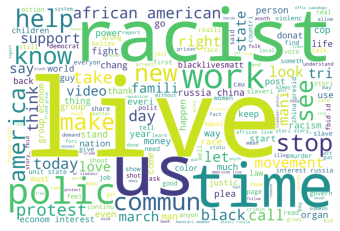

In [14]:
############# Form Word Cloud ###############
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Word Cloud takes a string. Convert our list of words into a string.
words_joined_stemmed = " ".join([w for w in news_words_filtered_stemmed])
words_joined = " ".join([w for w in news_words_filtered])
# print(words_joined[:1000])

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
my_wordcloud = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

# worldcloud2 = WordCloud(background_color='white',
#                          width=3000,
#                          height=2000).generate(words_joined_stemmed)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.savefig('FacebookWFCloud.png', dpi=300)
plt.show()
print("WordCloud Original")

# plt.imshow(worldcloud2)
# plt.axis('off')
# plt.show()
# print("WorldCloud Stemmed")



In [32]:
#instantiate CountVectorizer()
# print(len(data_list)*0.001)
Vector_stop_words = stopwords.words('english')
Vector_stop_words = Vector_stop_words + ['blacklivesmatter', 'blacklivesmatters', 'https', 'http', "blm", "co", "amp","discord", "sort", "always", "rg"]
cv=CountVectorizer(max_df = 0.85, stop_words =Vector_stop_words, min_df = 0.001, ngram_range= (1,2))

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(text_list)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print(word_count_vector)
#(294165 , 149940) refers to 294165 documents, 149940 refers to vocabulary size
# print idf values

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

# sort ascending
df_sorted = df_idf.sort_values(by=['idf_weights'], ascending = False)

print("Printing top 20 words out of",len(df_sorted))
print(df_sorted[:50])



Printing top 20 words out of 4388
                       idf_weights
homeland                  7.522338
check began               7.522338
chicago 2019              7.522338
legacy left               7.522338
war poverty               7.522338
war zone                  7.522338
watch 0xcf07kp            7.522338
cheers                    7.522338
watch 2s2qtgis            7.522338
chris rock                7.522338
offended                  7.522338
charles                   7.522338
charges                   7.522338
offender                  7.522338
treatment                 7.522338
offense                   7.522338
chicago every             7.522338
chicago war               7.522338
wanted created            7.522338
legit                     7.522338
legitimate                7.522338
children buses            7.522338
obviously                 7.522338
china also                7.522338
china deep                7.522338
six                       7.522338
sixth                

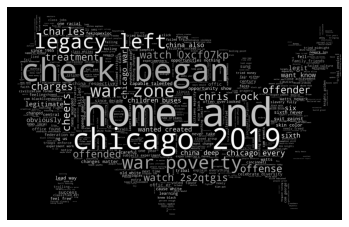

In [33]:
########## Generate IDF word cloud ################333

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
wc = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

weights = df_sorted.to_dict()

wc.generate_from_frequencies(weights['idf_weights'])

plt.imshow(wc)
plt.axis('off')
plt.savefig('FacebookIDFCloud.png', dpi=300)
plt.show()